# 전략 볼린저 밴드 이용 추세추종 기법 (심화버전 MFI)

매수 : 주가 상단 밴드 접근, 지표 강세를 확증할 때 매수  
%b > 0.8 and MFI > 80  
매도 : 주가 하단 밴드 접근, 지표 약세를 확증할 때 매도  
%b < 0.2 and MFI < 20   

#### test data 삼성전자

In [23]:
import time
from tqdm import tqdm

In [14]:
import pandas as pd 
df_raw = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/data Row/mom.csv', index_col=0)

In [15]:
df_raw = df_raw.drop(df_raw.iloc[:,8:],axis=1)

#### 전종목 볼린저밴드만들기

In [28]:
def make_bolinger_band(df):
    object_list = df['종목명'].unique()
    for i in tqdm(object_list):
        time.sleep(0.1)
        idx = df[df['종목명']==i].index
        df.loc[idx[0]:idx[-1],'MA20'] = df.loc[idx[0]:idx[-1],'종가'].rolling(window=20).mean()
        df.loc[idx[0]:idx[-1],'stddev'] = df.loc[idx[0]:idx[-1],'종가'].rolling(window=20).std()
    df['upper'] = df['MA20'] + (df['stddev'] * 2)   
    df['lower'] = df['MA20'] - (df['stddev'] * 2)
    df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
    df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100
    return df


In [29]:
df_bol = make_bolinger_band(df_raw)

100%|██████████| 2436/2436 [09:30<00:00,  4.27it/s]


In [31]:
df_bol.to_csv('bolinger.csv')

#### 시각화를 통한 검증

In [43]:
name = '삼성전자'
df_test = df_bol[df_bol['종목명']==name]

In [32]:
import matplotlib.pyplot as plt

c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mi-bi\anaconda3\envs\kis_pjt\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


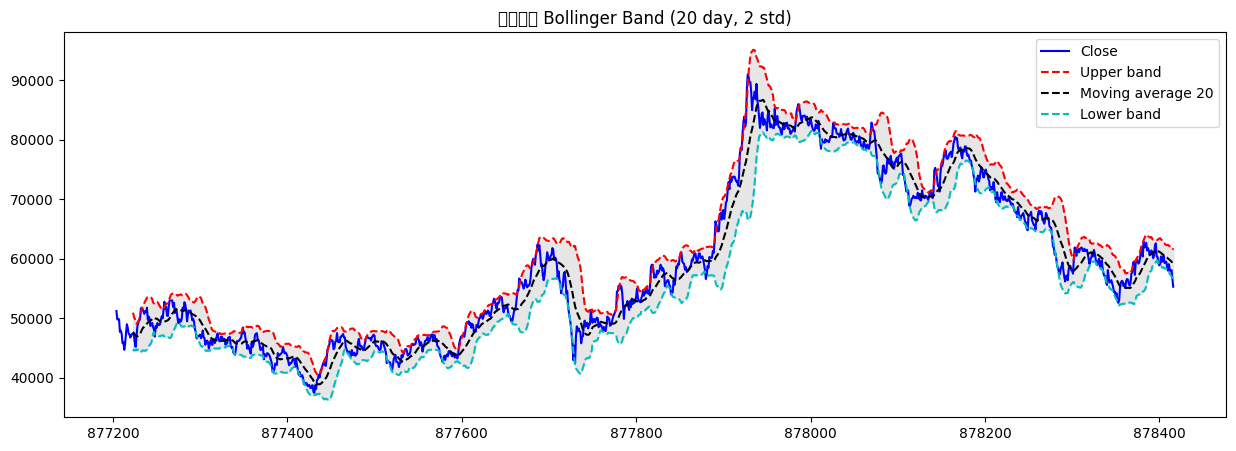

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(df_test.index, df_test['종가'], color='#0000ff', label='Close')    # ⑥
plt.plot(df_test.index, df_test['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label = 'Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title(f'{name} Bollinger Band (20 day, 2 std)')
plt.show()

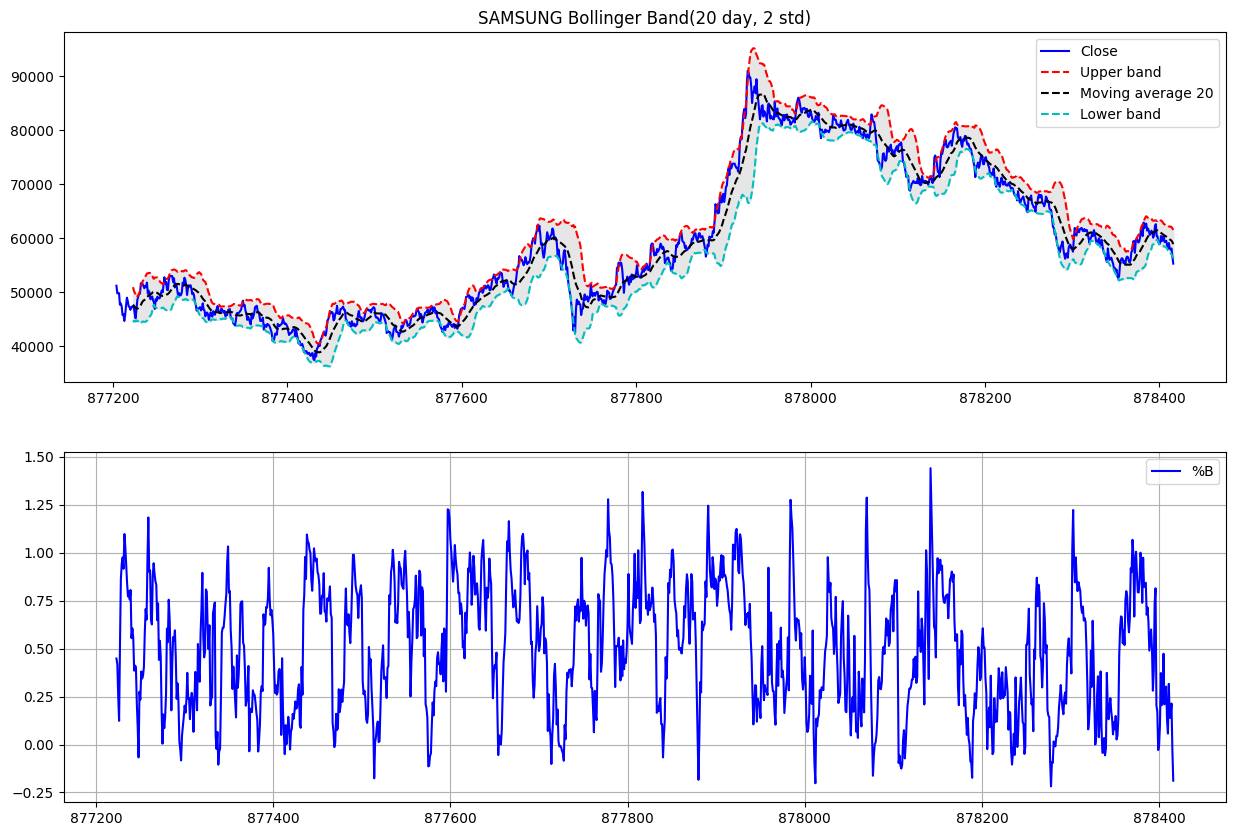

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)  # ②
plt.plot(df_test.index, df_test['종가'], color='#0000ff', label='Close')
plt.plot(df_test.index, df_test['upper'], 'r--', label = 'Upper band')
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label = 'Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')
plt.title('SAMSUNG Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df_test.index, df_test['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()

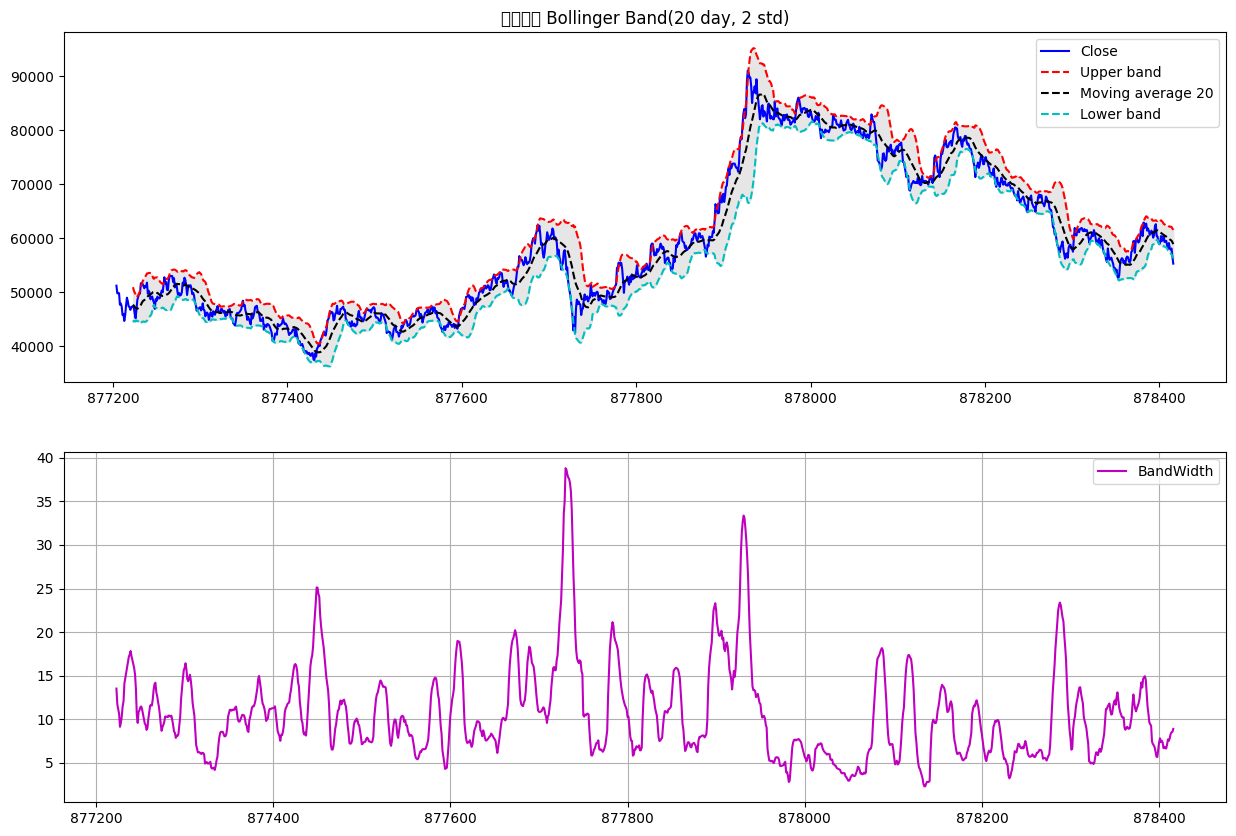

In [48]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df_test.index, df_test['종가'], color='#0000ff', label='Close')
plt.plot(df_test.index, df_test['upper'], 'r--', label ='Upper band')
plt.plot(df_test.index, df_test['MA20'], 'k--', label='Moving average 20')
plt.plot(df_test.index, df_test['lower'], 'c--', label ='Lower band')
plt.fill_between(df_test.index, df_test['upper'], df_test['lower'], color='0.9')
plt.title(f'{name} Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(df_test.index, df_test['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### MFI 는 미래데이터 이용하는데, 검증이필요함  
i+1 과 비교하긴하지만 3월7일 3월8일에서 3월8일 종가를 받는다->  3월 7일에 MFI 가 완성된다.  
3월 7일의 MFI 가 조건에 맞으면 투자 하면 되는것 아닌가??  
전일 MFI <

In [ ]:
def make_mfi(df):
    df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
    df['TP'] = (df['최고가'] + df['최저가'] + df['종가']) / 3
    df['PMF'] = 0
    df['NMF'] = 0
    object_list = df['종목명'].unique()
    for i in tqdm(object_list):
        time.sleep(0.1)
        idx = df[df['종목명']==i].index
        for i in idx:
            if df.TP.values[i] < df.TP.values[i+1]:
                df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
                df.NMF.values[i+1] = 0
            else:
                df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
                df.PMF.values[i+1] = 0
            df.loc[idx[0]:idx[-1],'MFR'] = (df.loc[idx[0]:idx[-1],'PMF'].rolling(window=10).sum() /df.loc[idx[0]:idx[-1],'MMF'].rolling(window=10).sum())
        df['MFI10'] = 100 - 100 / (1 + df['MFR'])


